# Проект. Защита персональных данных клиентов страховой компании

## Описание проекта

Необходимо защитить данные клиентов страховой компании «Хоть потоп». Требуется разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и обосновать корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

Путь к файлу:

* /datasets/insurance.csv

Описание данных:

- **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
- **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных и изучение

In [18]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

In [19]:
# write a function to overview data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

def data_read_file(file_path):
    data = pd.read_csv(file_path)
    display(data.head(10))
    display(data.tail(10))
    display(data.info())
    print('Duplicates in data:', sum(data.duplicated()))
    return data

In [20]:
data = data_read_file('/datasets/insurance.csv')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
4990,0,22.0,56800.0,1,0
4991,0,21.0,38300.0,3,0
4992,0,45.0,54600.0,0,1
4993,1,32.0,36000.0,1,0
4994,1,26.0,51400.0,0,0
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0
4999,1,28.0,40600.0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

Duplicates in data: 153


In [21]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**Промежуточный вывод:** БД содержит 5 столбцов - Пол, Возраст, Зарплата, Члены семьи, Страховые выплаты; а также 5000 строк. Пропущенных данных в таблице нет, присутствует 153 дубля. Считаю, что дубли убирать не стоит, потому что: 1)дубли могут быть от разных клиентов, но совпасть, так как вариативность данных низкая; 2) задание заключается в защите данных.

*Посмотрим графики*

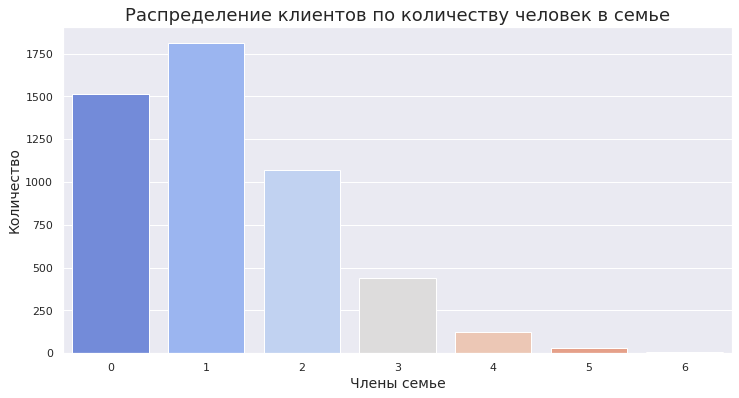

In [22]:
sns.set()
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='Члены семьи', data=data, palette='coolwarm')
ax.set_title('Распределение клиентов по количеству человек в семье', fontsize=18)
plt.ylabel('Количество', fontsize=14)
plt.xlabel('Члены семье', fontsize=14);


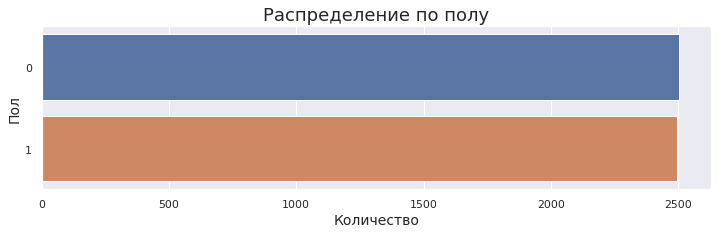

In [23]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.countplot(y='Пол', data=data)
ax.set_title('Распределение по полу', fontsize=18)
plt.ylabel('Пол', fontsize=14)
plt.xlabel('Количество', fontsize=14);

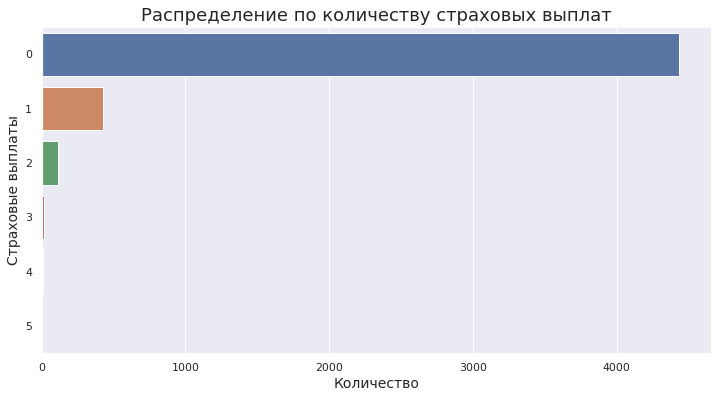

In [24]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(y='Страховые выплаты', data=data)
ax.set_title('Распределение по количеству страховых выплат', fontsize=18)
plt.ylabel('Страховые выплаты', fontsize=14)
plt.xlabel('Количество', fontsize=14);


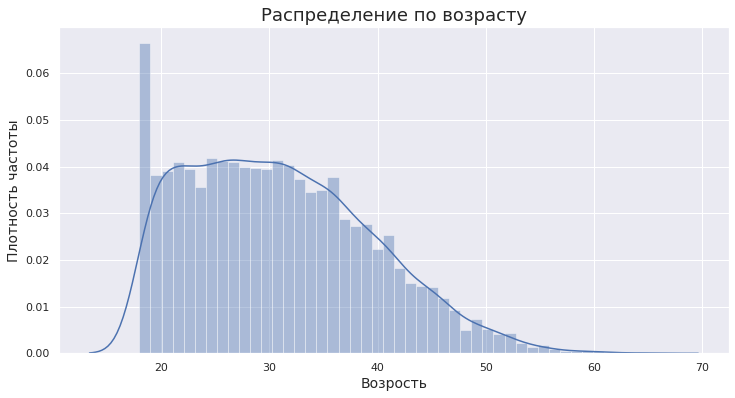

In [25]:
sns.set()
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(data['Возраст'], bins=len(data['Возраст'].unique()))
ax.set_title('Распределение по возрасту', fontsize=18)
plt.xlabel('Возрость', fontsize=14)
plt.ylabel('Плотность частоты', fontsize=14);

Большая плотность частоты в районе 18 лет обусловлена тем, что с 18 лет можно страховку оформлять

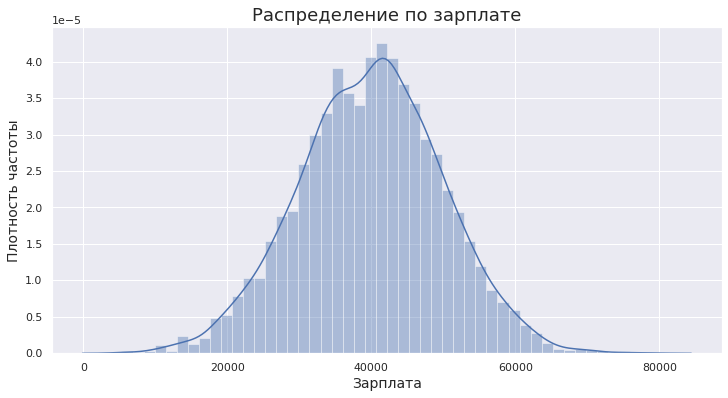

In [26]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.distplot(data['Зарплата'])
ax.set_title('Распределение по зарплате', fontsize=18)
plt.xlabel('Зарплата', fontsize=14)
plt.ylabel('Плотность частоты', fontsize=14);

**Выводы:** 
1. Импортированы библиотеки для работы и подгружены данные
2. Рассмотрена основная информация о данных
3. Данные визуализированы - аномалий нет

Продоложим исследование

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Разделим данные на признаки и целовое значение: **features** и **target**

In [27]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

Создадим класс **LinearRegression** и добавим методы *fit* и *predict*

In [28]:
class LinReg():
    
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
        self.w = w[1:]
        self.w0 = w[0]
        print(w)
        
        
    def predict(self, test_features):
        test_target = test_features @ self.w + self.w0
        return test_target

Инициализируем модель и обучим ее. Найдем её предсказания на обучающей выборке и сохраним их в переменной predictions. Напечатаем на экране веса и значение метрики R2.

In [29]:
model = LinReg()
model.fit(features, target)
predictions = model.predict(features)
print(r2_score(target, predictions))   

[-9.38235504e-01  7.92580543e-03  3.57083050e-02 -1.70080492e-07
 -1.35676623e-02]
0.42494550286668


**Создадим случайную квадратную матрицу**, размером по количеству столбцов *features*



In [30]:
random_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
random_matrix

array([[ 0.76182673,  1.9962691 ,  0.10959794, -1.97779436],
       [-0.90546475,  1.85539374, -0.71615384, -0.90641842],
       [-0.01366972,  1.0237262 ,  0.35892101,  1.43101842],
       [-1.42659853,  0.54501924,  0.2447199 ,  1.10500501]])

**Найдем обратную ей матрицу  с помощью np.linalg.inv**

In [31]:
inverse_random_matrix = np.linalg.inv(random_matrix)
inverse_random_matrix

array([[-0.04579148, -0.00865949,  0.49077086, -0.72462784],
       [ 0.15078732,  0.18970898,  0.36204243, -0.04335488],
       [ 0.85801133, -1.05784389, -0.35911733,  1.13304852],
       [-0.32351029,  0.12952592,  0.53456415, -0.26009229]])

**Найдем единичную матрицу, перемножив случайную и обратную**

In [32]:
unit_matrix = random_matrix @ inverse_random_matrix
unit_matrix

array([[ 1.00000000e+00,  5.87045452e-17,  2.98148625e-16,
         1.47502667e-16],
       [ 8.06350811e-17,  1.00000000e+00,  2.67114577e-17,
         2.63930214e-17],
       [ 1.09868023e-16, -1.28133003e-17,  1.00000000e+00,
        -5.99834812e-17],
       [ 2.31027361e-17, -8.85187439e-18,  1.11961926e-16,
         1.00000000e+00]])

Признаки умножим на random_matrix

In [33]:
encoded_features = features @ random_matrix
encoded_features

,0,1,2,3
0,-715.807148,50855.432050,17773.474337,70940.477441
1,-562.527497,38987.488807,13606.300200,54338.109529
2,-313.322686,21552.056660,7516.572846,30025.100582
3,-591.895457,42729.435930,14952.456520,59656.643130
4,-381.370988,26773.201166,9347.895773,37322.223122
5,-601.485047,42055.642520,14685.566023,58633.011240
6,-580.092547,40717.376882,14221.833320,56776.312974
7,-555.232541,39566.392586,13837.535797,55217.092586
8,-712.646796,50948.527702,17812.947208,71088.111375
9,-736.364386,52988.558531,18533.653852,73953.773879


In [34]:
model = LinReg()
model.fit(encoded_features, target)
predictions = model.predict(encoded_features)
print(r2_score(target, predictions))   

[-0.9382355   0.00915927  0.00855746 -0.04634615  0.00558983]
0.42494550286667176


**Получаем тоже самое**

Исходное уравнение для предсказаний высчитываются по формуле:

$$
a=Xw
$$

Новое уравнение для предсказаний с использованием новых весов w' и новой матрицы признаков X':

$$
a′=X′w′
$$

Мы знаем, что w' связано с исходными весами w следующим образом:

$$
w'= R^{-1}w
$$

Теперь подставим w' и X' в уравнение для a':

$$
a′=X′w′=XRw′
$$

Nеперь мы можем использовать выражение для w':

$$
a′=XR(R^{−1}w)=(XR)(R^{−1}w)
$$

Исходная матрица R умножается на обратную матрицу $R^{-1}$, что равно единичной матрице E. Поэтому:

$$
a′=(XE)w
$$

Единичная матрица E умножается на w, что оставляет w без изменений:

$$
a′=XEw=Xw
$$

Таким образом, мы видим, что предсказания a' с использованием новой матрицы признаков X' и новых весов w' равны предсказаниям a с использованием исходной матрицы признаков X и весов w. То есть:

$$
a'=a
$$


**Вывод:** 

Умножив признаки на обратимую матрицу, **качество линейной регрессии не изменилось.**

**Обоснование:** Веса изменились под новые значения, т.е. признаки исходной матрицы и преобразованной выражаются через коэффициенты(веса w), поэтому качество линейной регресии не изменилось

## Алгоритм преобразования

1. Создание случайной обратимой матрицы random_matrix: Генерируем случайную квадратную матрицу размера n x n, где n равно количеству признаков в features. Эта матрица должна быть обратимой (невырожденной).

2. Кодирование признаков: Умножаем исходную матрицу признаков features на random_matrix для получения закодированных признаков encoded_features.

3. Декодирование признаков: Для декодирования закодированных признаков encoded_features умножаем их на обратную матрицу random_matrix.

4. Обучение и оценка моделей: Создаем две модели LinearRegression. Первая модель (model1) обучается на исходных признаках features, а вторая модель (model2) обучается на декодированных признаках decoded_features. После обучения каждой модели вычисляем R-squared score (r2_score) для оценки их качества.

5. Если оценки одинаковые, то предложенный алгоритм кодировки работает.


## Проверка алгоритма

Напишем функцию для зашифровки исходных данных

In [40]:
#def encode(features):
#    random_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
#    encoded_features = features.dot(random_matrix)
#    return encoded_features



def generate_invertible_matrix(n):
    while True:
        random_matrix = np.random.normal(0, 1, (n, n))
        if np.linalg.det(random_matrix) != 0:
            return random_matrix

def encode(features):
    n = features.shape[1]
    random_matrix = generate_invertible_matrix(n)
    encoded_features = features.dot(random_matrix)
    return encoded_features

encode(features).head(10)

,0,1,2,3
0,-93488.997361,53034.366005,-97669.437029,71562.216298
1,-71614.093248,40623.645381,-74844.299782,54832.896961
2,-39573.289375,22447.282247,-41365.788620,30303.518508
3,-78610.473022,44596.418142,-82096.379017,60158.852037
4,-49189.073144,27902.884813,-51402.657586,37659.324110
5,-77272.008278,43835.209215,-80745.280271,59159.803483
6,-74823.973942,42446.830353,-78181.919597,57282.827000
7,-72761.282958,41280.267970,-75999.541453,55691.640569
8,-93681.498265,53144.088862,-97860.307975,71704.084878
9,-97455.721678,55285.651004,-101791.867243,74586.931180


Напишем функцию для расшифровки закодированных данных

In [41]:
def decode(encoded_features):
    decoded_features = round(abs(encoded_features.dot(np.linalg.inv(random_matrix))))
    for i in decoded_features.iloc[:, [0, 3]]:
        decoded_features[i] = decoded_features[i].astype(int)
    decoded_features.columns = features.columns
    return decoded_features

decode(encoded_features).head(10)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
5,1,43.0,41000.0,2
6,1,39.0,39700.0,2
7,1,25.0,38600.0,4
8,1,36.0,49700.0,1
9,1,32.0,51700.0,1


**Сравним с начальными значениями**

In [42]:
features.head(10)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
5,1,43.0,41000.0,2
6,1,39.0,39700.0,2
7,1,25.0,38600.0,4
8,1,36.0,49700.0,1
9,1,32.0,51700.0,1


Значения декодированных данных совпадает с начальными

Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.

Создадим модель sklearn_model и обучим на 2 обучающих матрицах:

- исходной features
- кодированной encoded_features

In [43]:
model = LinearRegression()
model.fit(features, target)
predictions =  model.predict(features)
print(r2_score(target, predictions))

0.4249455028666801


In [44]:
model = LinearRegression()
model.fit(encoded_features, target)
predictions =  model.predict(encoded_features)
print(r2_score(target, predictions))

0.4249455028666763


**Качество модели по двум наборам признаков совпадает**

# Вывод

1. Был проведен предварительный анализ данных и предложена модель шифрования параметров клиентов;

2. Алгоритм позворляет зашировать данные клиентов страховой компании, а потом дешифроватть их без потери качества модели предсказаний линейной регресси;

3. Качество метрики R2 для 2 матриц признаков: до преобразования и после равны, а также равны R2 по написанному класс линейной регресии LinReg, что говорит о ее правильном написании в сравнении с моделью из sklearn;

4. Реализованный алгоритм полностью удовлетворяет поставленной задаче Защиты персональных данных клиентов страховой компании.